In [1]:
import numpy as np

import tngsorted

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from h5py import File

In [3]:
f = File("/mnt/extraspace/rstiskalek/TNG50-1/postprocessing/catalogue_099.hdf5", 'r')

In [4]:
pos = f["SubhaloPos"][:]
mdm = f["SubhaloMassType"][:, 1] * 1e10
mhi = f["m_neutral_H"][:]


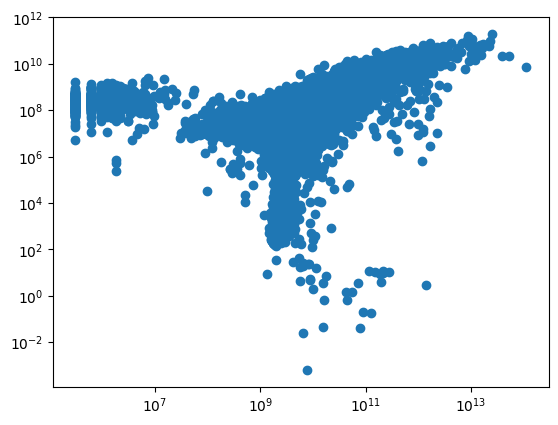

In [5]:
plt.figure()
plt.scatter(mdm, mhi)

plt.xscale("log")
plt.yscale("log")
plt.show()

In [6]:
# ks = np.random.choice(np.where((mdm > 1e11) & (mhi > 1e4))[0], 100)
ks = np.where((mdm > 1e11) & (mhi > 1e4))[0]
# np.random.shuffle(ks)

In [7]:
out = np.hstack([ks.reshape(-1, 1), pos[ks], mdm[ks].reshape(-1, 1), mhi[ks].reshape(-1, 1)])

np.savetxt("runA.txt", out, header="id x y z mdm mhi | M_dm > 1e11 Msun / h | MHI > 1e4 Msun / h", delimiter=", ")